## CBA / DMG2 / Supervised Learning Homework Assignment - 2


Submitted By: <b>Amit Kumar Sharma (PGID: 71721079)<b>

### Problem 2 – Binary Hierarchical Classifier

    •	Build a Bottom-up-Binary Hierarchical Classifier
    •	Use Linear SVM to build each of the pair-wise classifiers
    •	Merge two classes that give the highest training error
    •	Draw the entire tree that was discovered automatically
    •	For each node in the tree – write the training and test accuracies.

In [1]:
import os
import pandas as pd
from sklearn import svm
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
import graphviz
from anytree import Node, RenderTree
%matplotlib inline

In [2]:
train = pd.DataFrame()
for i in range(0,10):
    file = '/Users/a5sharma/Documents/ISB/DMG2/Assignment/data/MNIST/train'+str(i)+'.csv'
    temp = pd.read_csv(file,low_memory=False)
    temp = temp.iloc[:,1:]
    temp['label'] = str(i)
    if i == 0:
        train = temp
    else:
        train = pd.concat([train, temp],ignore_index=True)

In [3]:
test = pd.DataFrame()
for i in range(0,10):
    file = '/Users/a5sharma/Documents/ISB/DMG2/Assignment/data/MNIST/test'+str(i)+'.csv'
    temp = pd.read_csv(file,low_memory=False)
    temp = temp.iloc[:,1:]
    temp['label'] = str(i)
    if i == 0:
        test = temp
    else:
        test = pd.concat([test, temp],ignore_index=True)

In [4]:
train.apply(lambda x: sum(x.isnull()))

V1       391
V2       391
V3       391
V4       391
V5       391
V6       391
V7       391
V8       391
V9       391
V10      391
V11      391
V12      391
V13      391
V14      391
V15      391
V16      391
V17      391
V18      391
V19      391
V20      391
V21      391
V22      391
V23      391
V24      391
V25      391
V26      391
V27      391
V28      391
V29      391
V30      391
        ... 
V756     391
V757     391
V758     391
V759     391
V760     391
V761     391
V762     391
V763     391
V764     391
V765     391
V766     391
V767     391
V768     391
V769     391
V770     391
V771     391
V772     391
V773     391
V774     391
V775     391
V776     391
V777     391
V778     391
V779     391
V780     391
V781     391
V782     391
V783     391
V784     391
label      0
Length: 785, dtype: int64

In [5]:
train.dropna(axis=0,inplace=True)
test.dropna(axis=0,inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35750 entries, 0 to 36140
Columns: 785 entries, V1 to label
dtypes: float64(784), object(1)
memory usage: 214.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24250 entries, 0 to 24518
Columns: 785 entries, V1 to label
dtypes: float64(784), object(1)
memory usage: 145.4+ MB


In [8]:
train.iloc[:,0:784].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train['label'] = train['label'].astype('category')
test['label'] = test['label'].astype('category')

##### Create Tree Class for Tree Node

In [10]:
class Tree:
    def __init__(self, left, right, data, accuracy, test_accuracy):
        self.left = left
        self.right = right
        self.data = data
        self.accuracy = accuracy
        self.test_accuracy = test_accuracy

##### Build Linear SVM for pair wise classifier and Merge Two classes that gives highest training error.
##### Draw the Binary Tree

['0' '1' '2' '10' '4' '6' '7' '8' '9'] 0.0193
['0' '1' '2' '11' '4' '6' '7' '9'] 0.0367
['0' '1' '12' '4' '6' '7' '9'] 0.0214
['0' '1' '13' '4' '6' '7'] 0.0114
['0' '1' '14' '4' '6'] 0.0166
['0' '1' '15' '6'] 0.0164
['0' '1' '16'] 0.0097
['0' '17'] 0.0061
['18'] 0.0049
0 17 18 0.9951 0.9478
1 16 17 0.9939 0.9711
6 15 16 0.9903 0.9297
4 14 15 0.9836 0.9092
7 13 14 0.9834 0.9172
9 12 13 0.9886 0.9455
2 11 12 0.9786 0.9247
8 10 11 0.9633 0.9102
3 5 10 0.9807 0.9534


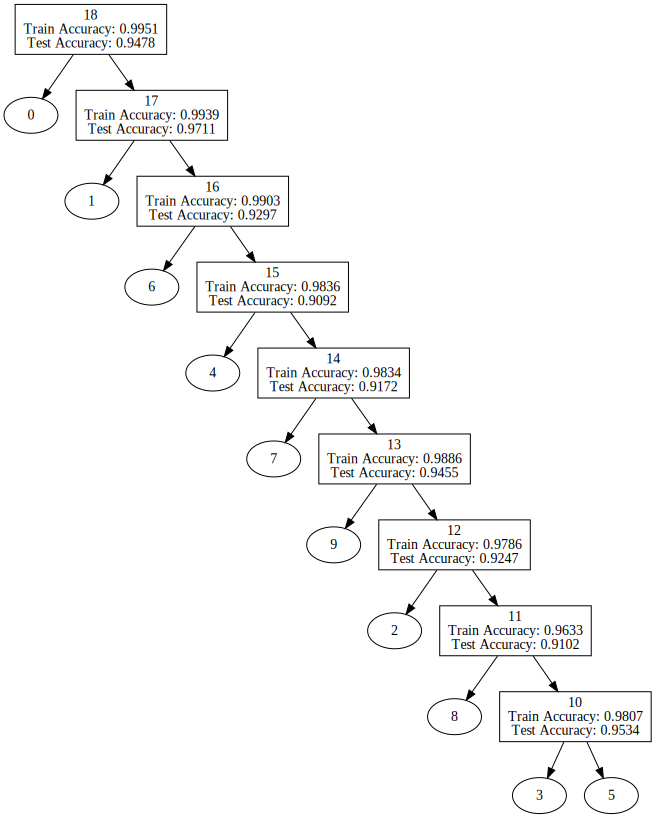

In [11]:
count = 0
train.loc[:,'MetaClass'] = train.label
test.loc[:,'MetaClass'] = test.label
train['MetaClass'] = train['MetaClass'].astype('object')
test['MetaClass'] = test['MetaClass'].astype('object')
loopTrue = True
classLevel = 9
tree = []
while loopTrue:
    class1 = []
    class2 = []
    train_error = []
    test_accuracy = []
    if count == 0 :
        for i in np.unique(train.MetaClass):
            for j in np.unique(train.MetaClass):
                if int(i) < int(j):
                    train1 = train[(train['MetaClass']==str(i)) | (train['MetaClass']==str(j))]
                    X_train = train1.iloc[:,0:784]/255.0
                    y_train = train1["MetaClass"]
                    
                    test1 = test[(test['MetaClass']==str(i)) | (test['MetaClass']==str(j))]
                    X_test = test1.iloc[:,0:784]/255.0
                    y_test = test1["MetaClass"]
                    
                    model1 = svm.LinearSVC()
                    model1.fit(X_train,y_train)
                    y_pred = model1.predict(X_train)
                    y_test_pred = model1.predict(X_test)
                    class1.append(i)
                    class2.append(j)
                    accuracy = metrics.accuracy_score(y_true=y_train, y_pred=y_pred)
                    train_error.append(round(1-accuracy, 4))
                    test_accuracy.append(round(metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred), 4))

        df7 = pd.DataFrame({'TrainError':train_error,'Class1':class1, 'Class2':class2,'TestAccuracy':test_accuracy})
        temp=df7[df7['TrainError']==max(df7['TrainError'])]
        if len(temp) > 0:
            classLevel = classLevel + 1
            for i in [(i[0],i[1],i[2],i[3]) for i in temp[['Class1','Class2', 'TrainError', 'TestAccuracy']].values]:
                train.loc[(train['MetaClass']==str(i[0])) | (train['MetaClass']==str(i[1])),'MetaClass'] = str(classLevel)
                t = Tree(str(i[0]), str(i[1]), str(classLevel), 1-i[2], i[3])
                tree.append(t)
        print(train['MetaClass'].unique(), max(df7['TrainError']))
    count = count +1
    if count > 0:
        for i in np.unique(train.MetaClass):
            if int(i) < classLevel:
                train1 = train[(train['MetaClass']==str(i)) | (train['MetaClass']==str(classLevel))]
                X_train = train1.iloc[:,0:784]/255.0
                y_train = train1["MetaClass"]
                
                test1 = test[(test['MetaClass']==str(i)) | (test['MetaClass']==str(classLevel))]
                X_test = test1.iloc[:,0:784]/255.0
                y_test = test1["MetaClass"]
                
                model1 = svm.LinearSVC()
                model1.fit(X_train,y_train)
                y_pred = model1.predict(X_train)
                y_test_pred = model1.predict(X_test)
                class1.append(i)
                class2.append(classLevel)
                accuracy = round(metrics.accuracy_score(y_true=y_train, y_pred=y_pred),4)
                train_error.append(round(1-accuracy, 4))
                test_accuracy.append(round(metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred), 4))

        df7 = pd.DataFrame({'TrainError':train_error,'Class1':class1, 'Class2':class2,'TestAccuracy':test_accuracy})
        temp=df7[df7['TrainError']==max(df7['TrainError'])]
        if len(temp) > 0:
            classLevel = classLevel + 1
            for i in [(i[0],i[1],i[2],i[3]) for i in temp[['Class1','Class2', 'TrainError','TestAccuracy']].values]:
                train.loc[(train['MetaClass']==str(i[0])) | (train['MetaClass']==str(i[1])),'MetaClass'] = str(classLevel)
                t = Tree(str(i[0]), str(i[1]), str(classLevel), 1-i[2], i[3])
                tree.append(t)
        print(train['MetaClass'].unique(), max(df7['TrainError']))
    
    if len(train['MetaClass'].unique()) == 1:
        loopTrue = False
        
dot = graphviz.Digraph(comment='Binary Tree')
nodes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
edges = []
tree = sorted(tree, key=lambda x: x.data, reverse=True)
for i in range(0,len(tree)):
    t = tree[i]
    print(t.left, t.right, t.data, t.accuracy, t.test_accuracy)
    parentNode = str(nodes[int(t.data)-1])
    leftChild = str(nodes[int(t.left)-1])
    rightChild = str(nodes[int(t.right)-1])
    
    dot.node(parentNode, t.data + "\n Train Accuracy: "+ str(t.accuracy) + "\n Test Accuracy: "+ str(t.test_accuracy),shape='box')
    dot.node(leftChild, t.left)
    if int(t.data) > 10:
        dot.node(rightChild, t.right + "\n Train Accuracy: "+ str(t.accuracy) + "\n Test Accuracy: "+ str(t.test_accuracy),shape='box')
    else:
        dot.node(rightChild, t.right)

    str1 = parentNode+leftChild
    str2 = parentNode+rightChild
    edges.append(str1)
    edges.append(str2)
dot.edges(edges)

dot

In [12]:
rootNode = Node("18")
marc = Node("17", parent=rootNode)
marc1 = Node("0", parent=rootNode)
lian = Node("1", parent=marc)
lian1 = Node("16", parent=marc)
lian2 = Node("15", parent=lian1)
lian3 = Node("6", parent=lian1)
lian5 = Node("14", parent=lian2)
lian6 = Node("4", parent=lian2)
lian7 = Node("13", parent=lian5)
lian8 = Node("7", parent=lian5)
lian9 = Node("12", parent=lian7)
lian10 = Node("9", parent=lian7)
lian11 = Node("2", parent=lian9)
lian12 = Node("11", parent=lian9)
lian13 = Node("8", parent=lian12)
lian14 = Node("10", parent=lian12)
lian15 = Node("3", parent=lian14)
lian16 = Node("5", parent=lian14)

for pre, fill, node in RenderTree(rootNode):
    print("%s%s" % (pre, node.name))

18
├── 17
│   ├── 1
│   └── 16
│       ├── 15
│       │   ├── 14
│       │   │   ├── 13
│       │   │   │   ├── 12
│       │   │   │   │   ├── 2
│       │   │   │   │   └── 11
│       │   │   │   │       ├── 8
│       │   │   │   │       └── 10
│       │   │   │   │           ├── 3
│       │   │   │   │           └── 5
│       │   │   │   └── 9
│       │   │   └── 7
│       │   └── 4
│       └── 6
└── 0
